In [ ]:
!pip3 install pycocotools

In [ ]:
!pip3 install pixellib

In [ ]:
!pip3 install pixellib --upgrade

In [ ]:
%cd drive/MyDrive

/content/drive/MyDrive


In [ ]:
!ls

 113_117_8.mp4	  386_399_1.mp4      Project
 137_166_5.mp4	  411_414_10.mp4     Project_frame_rate1
 173_177_11.mp4   444_459_16.mp4     Project_frame_rate2
 196_227_17.mp4   486_515_6.mp4     'Research Paper'
 234_239_7.mp4	  516_524_12.mp4    'Segmentation Models'
 262_274_15.mp4   544_552_13.mp4    'soccer_green2white_inrange_lab2 (1).jpg'
 285_289_9.mp4	  74_105_2.mp4	     train
 303_318_0.mp4	 'Colab Notebooks'   TRAIN
 356_364_4.mp4	  output.jpg	     weights


In [ ]:
%cd Project_frame_rate2

/content/drive/MyDrive/Project_frame_rate2


In [ ]:
!ls

0  1  10  11  12  13  14  15  16  17  2  2022  3  4  5	6  7  8  9


In [ ]:
import pandas as pd
import numpy as np
import os
import glob
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip


In [ ]:
for i in range(18):
  os.mkdir(str(i))

In [ ]:
!ls

0  1  10  11  12  13  14  15  16  17  2  2022  3  4  5	6  7  8  9


In [ ]:
def time_convert(x):
    h,m,s = map(int,x.split(':'))
    return (h*60+m)*60+s

In [ ]:
os.listdir("./2022/A1/")

['user_id_24026',
 'user_id_35133',
 'user_id_38058',
 'user_id_49381',
 'user_id_24491']

## **user_id_24026**

In [ ]:
import cv2 
def getFrame(sec,path): 
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000) 
    hasFrames,image = vidcap.read() 
    folder = path.split("/")[-1][:-4].split("_")[-1]
    folder2 = path.split("/")[1]
    time_stamp = path.split("/")[-1][:-4]
    if hasFrames:
        print("./"+ folder +"/"+ folder2+"_" + time_stamp +"_"+ str(sec) +"_" + time_stamp + '.jpg')
        cv2.imwrite("./"+ folder +"/"+ folder2+"_"+ str(sec) +"_" + time_stamp + '.jpg', image)     # save frame as JPG file 
    return hasFrames 



In [ ]:
dir = './2022/A1/user_id_24026'
files = glob.glob(os.path.join(dir, '*.csv'))
data = pd.read_csv(files[0])
data = data.replace(r'^\s*$', np.nan, regex=True)
data['User ID'].fillna(data['User ID'][0],inplace=True)
data["Filename"].fillna(method='ffill',inplace=True)
data = data[data['Label/Class ID'].notna()]
data=data[pd.to_numeric(data['Label/Class ID'], errors='coerce').notnull()]
data["Start Time"] = data["Start Time"].apply(time_convert)
data["End Time"] = data["End Time"].apply(time_convert)
x = [a.split("/")[-1][:-4] for a in glob.glob(os.path.join(dir,'*MP4'))]
x.sort()
a = data["Filename"].unique()
a.sort()
data['Filename'] = data['Filename'].replace(a,x)
files = glob.glob(os.path.join(dir, '*.MP4'))
lst = [a.split("/")[-1] for a in files]
lst = [e[0:-4] for e in lst]
# # lst = [i.split('/')[1] for i in lst]
for user_activity_folder in lst:
  os.mkdir(user_activity_folder)
for j in glob.glob(os.path.join(dir, '*.MP4')):
  f_name = j.split("/")[-1][:-4]
  data2 = data[data["Filename"]==f_name]
  for a,b,c in zip(data2["Start Time"], data2["End Time"],data2["Label/Class ID"]):
    ffmpeg_extract_subclip(j, a, b, targetname=f_name+"/"+str(a)+"_"+str(b)+"_"+str(int(c))+".mp4")
  print(j)
  print(f_name)


In [ ]:
data

,User ID,Filename,Camera View,Activity Type,Start Time,End Time,Label/Class ID,Appearance Block
1,24026,Dashboard_User_id_24026_NoAudio_3,Dashboard,Distracted,8,31,10,None
2,24026,Dashboard_User_id_24026_NoAudio_3,Dashboard,Distracted,41,59,9,None
3,24026,Dashboard_User_id_24026_NoAudio_3,Dashboard,Distracted,69,86,0,None
4,24026,Dashboard_User_id_24026_NoAudio_3,Dashboard,Distracted,96,120,3,None
5,24026,Dashboard_User_id_24026_NoAudio_3,Dashboard,Distracted,130,147,1,None
...,...,...,...,...,...,...,...,...
112,24026,Right_side_window_User_id_24026_NoAudio_4,Rightside_window,Distracted,411,433,14,Sunglass
113,24026,Right_side_window_User_id_24026_NoAudio_4,Rightside_window,Distracted,443,461,15,Sunglass
114,24026,Right_side_window_User_id_24026_NoAudio_4,Rightside_window,Distracted,471,489,13,Sunglass
115,24026,Right_side_window_User_id_24026_NoAudio_4,Rightside_window,Distracted,499,521,11,Sunglass


In [ ]:
for i in data["Filename"].unique():
  # print(i)
  for j in glob.glob(os.path.join("./"+i, '*.mp4')):
    # print(j.split("/")[-1][:-4])

    vidcap = cv2.VideoCapture(j) 
    sec = 0 
    frameRate = 4
    success = getFrame(sec,j) 
    while success: 
        sec = sec + frameRate 
        sec = round(sec, 2) 
        success = getFrame(sec,j)

### **user_id_35133**

In [ ]:
dir = './2022/A1/user_id_35133'
files = glob.glob(os.path.join(dir, '*.csv'))
data = pd.read_csv(files[0])
data = data.replace(r'^\s*$', np.nan, regex=True)
data['User ID'].fillna(data['User ID'][0],inplace=True)
data["Filename"].fillna(method='ffill',inplace=True)
data = data[data['Label/Class ID'].notna()]
data=data[pd.to_numeric(data['Label/Class ID'], errors='coerce').notnull()]
data["Start Time"] = data["Start Time"].apply(time_convert)
data["End Time"] = data["End Time"].apply(time_convert)
x = [a.split("/")[-1][:-4] for a in glob.glob(os.path.join(dir,'*MP4'))]
x.sort()
a = data["Filename"].unique()
a.sort()
data['Filename'] = data['Filename'].replace(a,x)
files = glob.glob(os.path.join(dir, '*.MP4'))
lst = [a.split("/")[-1] for a in files]
lst = [e[0:-4] for e in lst]
# # lst = [i.split('/')[1] for i in lst]
for user_activity_folder in lst:
  os.mkdir(user_activity_folder)
for j in glob.glob(os.path.join(dir, '*.MP4')):
  f_name = j.split("/")[-1][:-4]
  data2 = data[data["Filename"]==f_name]
  for a,b,c in zip(data2["Start Time"], data2["End Time"],data2["Label/Class ID"]):
    ffmpeg_extract_subclip(j, a, b, targetname=f_name+"/"+str(a)+"_"+str(b)+"_"+str(int(c))+".mp4")
  print(j)
  print(f_name)


In [ ]:
for i in data["Filename"].unique():
  # print(i)
  for j in glob.glob(os.path.join("./"+i, '*.mp4')):
    # print(j.split("/")[-1][:-4])

    vidcap = cv2.VideoCapture(j) 
    sec = 0 
    frameRate = 4
    success = getFrame(sec,j) 
    while success: 
        sec = sec + frameRate 
        sec = round(sec, 2) 
        success = getFrame(sec,j)

## **user_id_38058**

In [ ]:
dir = './2022/A1/user_id_38058'
files = glob.glob(os.path.join(dir, '*.csv'))
data = pd.read_csv(files[0])
data = data.replace(r'^\s*$', np.nan, regex=True)
data['User ID'].fillna(data['User ID'][0],inplace=True)
data["Filename"].fillna(method='ffill',inplace=True)
data = data[data['Label/Class ID'].notna()]
data=data[pd.to_numeric(data['Label/Class ID'], errors='coerce').notnull()]
data["Start Time"] = data["Start Time"].apply(time_convert)
data["End Time"] = data["End Time"].apply(time_convert)
x = [a.split("/")[-1][:-4] for a in glob.glob(os.path.join(dir,'*MP4'))]
x.sort()
a = data["Filename"].unique()
a.sort()
data['Filename'] = data['Filename'].replace(a,x)
files = glob.glob(os.path.join(dir, '*.MP4'))
lst = [a.split("/")[-1] for a in files]
lst = [e[0:-4] for e in lst]
# # lst = [i.split('/')[1] for i in lst]
for user_activity_folder in lst:
  os.mkdir(user_activity_folder)
for j in glob.glob(os.path.join(dir, '*.MP4')):
  f_name = j.split("/")[-1][:-4]
  data2 = data[data["Filename"]==f_name]
  for a,b,c in zip(data2["Start Time"], data2["End Time"],data2["Label/Class ID"]):
    ffmpeg_extract_subclip(j, a, b, targetname=f_name+"/"+str(a)+"_"+str(b)+"_"+str(int(c))+".mp4")
  print(j)
  print(f_name)


In [ ]:
for i in data["Filename"].unique():
  # print(i)
  for j in glob.glob(os.path.join("./"+i, '*.mp4')):
    # print(j.split("/")[-1][:-4])

    vidcap = cv2.VideoCapture(j) 
    sec = 0 
    frameRate = 4
    success = getFrame(sec,j) 
    while success: 
        sec = sec + frameRate 
        sec = round(sec, 2) 
        success = getFrame(sec,j)

## **User_id_49381**

In [ ]:
dir = './2022/A1/user_id_49381'
files = glob.glob(os.path.join(dir, '*.csv'))
data = pd.read_csv(files[0])
data = data.replace(r'^\s*$', np.nan, regex=True)
data['User ID'].fillna(data['User ID'][0],inplace=True)
data["Filename"].fillna(method='ffill',inplace=True)
data = data[data['Label/Class ID'].notna()]
data=data[pd.to_numeric(data['Label/Class ID'], errors='coerce').notnull()]
data["Start Time"] = data["Start Time"].apply(time_convert)
data["End Time"] = data["End Time"].apply(time_convert)
x = [a.split("/")[-1][:-4] for a in glob.glob(os.path.join(dir,'*MP4'))]
x.sort()
a = data["Filename"].unique()
a.sort()
data['Filename'] = data['Filename'].replace(a,x)
files = glob.glob(os.path.join(dir, '*.MP4'))
lst = [a.split("/")[-1] for a in files]
lst = [e[0:-4] for e in lst]
# # lst = [i.split('/')[1] for i in lst]
for user_activity_folder in lst:
  os.mkdir(user_activity_folder)
for j in glob.glob(os.path.join(dir, '*.MP4')):
  f_name = j.split("/")[-1][:-4]
  data2 = data[data["Filename"]==f_name]
  for a,b,c in zip(data2["Start Time"], data2["End Time"],data2["Label/Class ID"]):
    ffmpeg_extract_subclip(j, a, b, targetname=f_name+"/"+str(a)+"_"+str(b)+"_"+str(int(c))+".mp4")
  print(j)
  print(f_name)


In [ ]:
for i in data["Filename"].unique():
  # print(i)
  for j in glob.glob(os.path.join("./"+i, '*.mp4')):
    # print(j.split("/")[-1][:-4])

    vidcap = cv2.VideoCapture(j) 
    sec = 0 
    frameRate = 4
    success = getFrame(sec,j) 
    while success: 
        sec = sec + frameRate 
        sec = round(sec, 2) 
        success = getFrame(sec,j)

## **User_id_24491**

In [ ]:
dir = './2022/A1/user_id_24491'
files = glob.glob(os.path.join(dir, '*.csv'))
data = pd.read_csv(files[0])
data = data.replace(r'^\s*$', np.nan, regex=True)
data['User ID'].fillna(data['User ID'][0],inplace=True)
data["File Name"].fillna(method='ffill',inplace=True)
data = data[data['Label/Class ID'].notna()]
data=data[pd.to_numeric(data['Label/Class ID'], errors='coerce').notnull()]
data["Start Time"] = "0:"+data["Start Time"]
data["End Time"] = "0:"+data["End Time"]
data["Start Time"] = data["Start Time"].apply(time_convert)
data["End Time"] = data["End Time"].apply(time_convert)
x = [a.split("/")[-1][:-4] for a in glob.glob(os.path.join(dir,'*MP4'))]
x.sort()
a = data["File Name"].unique()
a.sort()
data['File Name'] = data['File Name'].replace(a,x)
data["Filename"] = data["File Name"]
data = data.drop(columns=['File Name'])
files = glob.glob(os.path.join(dir, '*.MP4'))
lst = [a.split("/")[-1] for a in files]
lst = [e[0:-4] for e in lst]
# # lst = [i.split('/')[1] for i in lst]
for user_activity_folder in lst:
  os.mkdir(user_activity_folder)
for j in glob.glob(os.path.join(dir, '*.MP4')):
  f_name = j.split("/")[-1][:-4]
  data2 = data[data["Filename"]==f_name]
  for a,b,c in zip(data2["Start Time"], data2["End Time"],data2["Label/Class ID"]):
    ffmpeg_extract_subclip(j, a, b, targetname=f_name+"/"+str(a)+"_"+str(b)+"_"+str(int(c))+".mp4")
  print(j)
  print(f_name)


In [ ]:
for i in data["Filename"].unique():
  # print(i)
  for j in glob.glob(os.path.join("./"+i, '*.mp4')):
    # print(j.split("/")[-1][:-4])

    vidcap = cv2.VideoCapture(j) 
    sec = 0 
    frameRate = 4
    success = getFrame(sec,j) 
    while success: 
        sec = sec + frameRate 
        sec = round(sec, 2) 
        success = getFrame(sec,j)

In [ ]:
# for users in os.listdir("./2022/A1/"):
#   dir = './2022/A1/'+ users
#   files = glob.glob(os.path.join(dir, '*.csv'))
#   data = pd.read_csv(files[0])
#   data['User ID'].fillna(data['User ID'][0],inplace=True)
#   if users.split("_")[-1] == '24026':
#     data3 = data
#   if users.split("_")[-1] != '24491':
#     data["Filename"].fillna(method='ffill',inplace=True)
#     data = data[data['Label/Class ID'].notna()]
#     data["Start Time"] = data["Start Time"].apply(time_convert)
#     data["End Time"] = data["End Time"].apply(time_convert)
#     data["Filename"] = data['Filename'].replace("Dashboard_User_id_"+users.split("_")[-1]+"_0","Dashboard_user_id_"+users.split("_")[-1]+"_NoAudio_0",regex=True)
#     data["Filename"] = data['Filename'].replace("Dashboard_User_id_"+users.split("_")[-1]+"_1","Dashboard_user_id_"+users.split("_")[-1]+"_NoAudio_1",regex=True)
#     data["Filename"] = data['Filename'].replace("Dashboard_User_id_"+users.split("_")[-1]+"_2","Dashboard_user_id_"+users.split("_")[-1]+"_NoAudio_2",regex=True)
#     data["Filename"] = data['Filename'].replace("Dashboard_User_id_"+users.split("_")[-1]+"_3","Dashboard_user_id_"+users.split("_")[-1]+"_NoAudio_3",regex=True)
#     data["Filename"] = data['Filename'].replace("Dashboard_User_id_"+users.split("_")[-1]+"_4","Dashboard_user_id_"+users.split("_")[-1]+"_NoAudio_4",regex=True)
#     data["Filename"] = data['Filename'].replace("Right_side_window_User_id_"+users.split("_")[-1]+"_0","Right_window_user_id_"+users.split("_")[-1]+"_NoAudio_0",regex=True)
#     data["Filename"] = data['Filename'].replace("Right_side_window_User_id_"+users.split("_")[-1]+"_1","Right_window_user_id_"+users.split("_")[-1]+"_NoAudio_1",regex=True)
#     data["Filename"] = data['Filename'].replace("Right_side_window_User_id_"+users.split("_")[-1]+"_2","Right_window_user_id_"+users.split("_")[-1]+"_NoAudio_2",regex=True)
#     data["Filename"] = data['Filename'].replace("Right_side_window_User_id_"+users.split("_")[-1]+"_3","Right_window_user_id_"+users.split("_")[-1]+"_NoAudio_3",regex=True)
#     data["Filename"] = data['Filename'].replace("Right_side_window_User_id_"+users.split("_")[-1]+"_4","Right_window_user_id_"+users.split("_")[-1]+"_NoAudio_4",regex=True)
#     data["Filename"] = data['Filename'].replace("Rear_view_User_id_"+users.split("_")[-1]+"_0","Rearview_mirror_user_id_"+users.split("_")[-1]+"_NoAudio_0",regex=True)
#     data["Filename"] = data['Filename'].replace("Rear_view_User_id_"+users.split("_")[-1]+"_1","Rearview_mirror_user_id_"+users.split("_")[-1]+"_NoAudio_1",regex=True)
#     data["Filename"] = data['Filename'].replace("Rear_view_User_id_"+users.split("_")[-1]+"_2","Rearview_mirror_user_id_"+users.split("_")[-1]+"_NoAudio_2",regex=True)
#     data["Filename"] = data['Filename'].replace("Rear_view_User_id_"+users.split("_")[-1]+"_3","Rearview_mirror_user_id_"+users.split("_")[-1]+"_NoAudio_3",regex=True)
#     data["Filename"] = data['Filename'].replace("Rear_view_User_id_"+users.split("_")[-1]+"_4","Rearview_mirror_user_id_"+users.split("_")[-1]+"_NoAudio_4",regex=True)
#   else:
#     data["File Name"].fillna(method='ffill',inplace=True)
#     data = data[data['Label/Class ID'].notna()]
#     data["Start Time"] = "0:"+data["Start Time"]
#     data["End Time"] = "0:"+data["End Time"]
#     data["Start Time"] = data["Start Time"].apply(time_convert)
#     data["End Time"] = data["End Time"].apply(time_convert)
#     data["File Name"] = data['File Name'].replace("Dashboard_User_id_"+users.split("_")[-1]+"_0","Dashboard_user_id_"+users.split("_")[-1]+"_NoAudio_0",regex=True)
#     data["File Name"] = data['File Name'].replace("Dashboard_User_id_"+users.split("_")[-1]+"_1","Dashboard_user_id_"+users.split("_")[-1]+"_NoAudio_1",regex=True)
#     data["File Name"] = data['File Name'].replace("Dashboard_User_id_"+users.split("_")[-1]+"_2","Dashboard_user_id_"+users.split("_")[-1]+"_NoAudio_2",regex=True)
#     data["File Name"] = data['File Name'].replace("Dashboard_User_id_"+users.split("_")[-1]+"_3","Dashboard_user_id_"+users.split("_")[-1]+"_NoAudio_3",regex=True)
#     data["File Name"] = data['File Name'].replace("Dashboard_User_id_"+users.split("_")[-1]+"_4","Dashboard_user_id_"+users.split("_")[-1]+"_NoAudio_4",regex=True)
#     data["File Name"] = data['File Name'].replace("Right_side_window_User_id_"+users.split("_")[-1]+"_0","Right_window_user_id_"+users.split("_")[-1]+"_NoAudio_0",regex=True)
#     data["File Name"] = data['File Name'].replace("Right_side_window_User_id_"+users.split("_")[-1]+"_1","Right_window_user_id_"+users.split("_")[-1]+"_NoAudio_1",regex=True)
#     data["File Name"] = data['File Name'].replace("Right_side_window_User_id_"+users.split("_")[-1]+"_2","Right_window_user_id_"+users.split("_")[-1]+"_NoAudio_2",regex=True)
#     data["File Name"] = data['File Name'].replace("Right_side_window_User_id_"+users.split("_")[-1]+"_3","Right_window_user_id_"+users.split("_")[-1]+"_NoAudio_3",regex=True)
#     data["File Name"] = data['File Name'].replace("Right_side_window_User_id_"+users.split("_")[-1]+"_4","Right_window_user_id_"+users.split("_")[-1]+"_NoAudio_4",regex=True)
#     data["File Name"] = data['File Name'].replace("Rear_view_User_id_"+users.split("_")[-1]+"_0","Rearview_mirror_user_id_"+users.split("_")[-1]+"_NoAudio_0",regex=True)
#     data["File Name"] = data['File Name'].replace("Rear_view_User_id_"+users.split("_")[-1]+"_1","Rearview_mirror_user_id_"+users.split("_")[-1]+"_NoAudio_1",regex=True)
#     data["File Name"] = data['File Name'].replace("Rear_view_User_id_"+users.split("_")[-1]+"_2","Rearview_mirror_user_id_"+users.split("_")[-1]+"_NoAudio_2",regex=True)
#     data["File Name"] = data['File Name'].replace("Rear_view_User_id_"+users.split("_")[-1]+"_3","Rearview_mirror_user_id_"+users.split("_")[-1]+"_NoAudio_3",regex=True)
#     data["File Name"] = data['File Name'].replace("Rear_view_User_id_"+users.split("_")[-1]+"_4","Rearview_mirror_user_id_"+users.split("_")[-1]+"_NoAudio_4",regex=True)
#     data["Filename"] = data["File Name"]
#     data = data.drop(columns=['File Name'])
#   # data.to_csv(users+".csv")
#   # if users.split("_")[-1] == '24026':
#   #   data3 = data
#   files = glob.glob(os.path.join(dir, '*.MP4'))
#   lst = [a.split("/")[-1] for a in files]
#   lst = [e[0:-4] for e in lst]
#   print("user "+users,lst)
#   # # lst = [i.split('/')[1] for i in lst]
#   for user_activity_folder in lst:
#     os.mkdir(user_activity_folder)
#   # for j in glob.glob(os.path.join(dir, '*.MP4')):
#   #   f_name = j.split("/")[-1][:-4]
#   #   data2 = data[data["Filename"]==f_name]
#   #   for a,b,c in zip(data2["Start Time"], data2["End Time"],data2["Label/Class ID"]):
#   #     ffmpeg_extract_subclip(j, a, b, targetname=f_name+"/"+str(a)+"_"+str(b)+"_"+str(int(c))+".mp4")
#   #   print(j)
#   #   print(f_name)

In [ ]:
for i in range(18):
  os.mkdir(str(i)+"_Segmented")


In [ ]:
!ls

0	      12	    15_Segmented  2022	       5_Segmented  9
0_Segmented   12_Segmented  16		  2_Segmented  6	    9_Segmented
1	      13	    16_Segmented  3	       6_Segmented
10	      13_Segmented  17		  3_Segmented  7
10_Segmented  14	    17_Segmented  4	       7_Segmented
11	      14_Segmented  1_Segmented   4_Segmented  8
11_Segmented  15	    2		  5	       8_Segmented


In [ ]:

import pixellib
from pixellib.instance import instance_segmentation

ins = instance_segmentation()
# msk = "/content/drive/MyDrive/Segmentation Models/mask_rcnn_coco.h5"
ins.load_model("../Segmentation Models/mask_rcnn_coco.h5")
ins.segmentImage("./1/Dashboard_User_id_24026_NoAudio_3_14_130_147_1.jpg", show_bboxes = True, output_image_name = "image_new.jpg")
target_classes = ins.select_target_classes(person = True)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Processed image saved successfully in your current working directory.


In [ ]:
import matplotlib.pyplot as plt
import cv2

TypeError: ignored

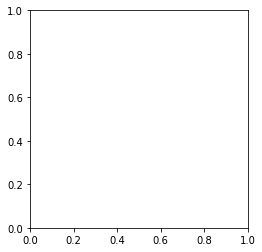

In [ ]:
plt.imshow(cv2.imread("./0/image_new.jpg"))

In [ ]:
import os

In [ ]:
%cd ..

/content/drive/MyDrive/Project


In [ ]:
glob.glob(os.path.join("./", '*_Segmented'))

['./0_Segmented',
 './1_Segmented',
 './2_Segmented',
 './3_Segmented',
 './4_Segmented',
 './5_Segmented',
 './6_Segmented',
 './7_Segmented',
 './8_Segmented',
 './9_Segmented',
 './10_Segmented',
 './11_Segmented',
 './12_Segmented',
 './13_Segmented',
 './14_Segmented',
 './15_Segmented',
 './16_Segmented',
 './17_Segmented']

In [ ]:
for i in glob.glob(os.path.join("./", '*_Segmented')):
  # print(i)
  # print("."+i.split("_")[0])
  os.chdir(i)
  ins.segmentBatch("."+i.split("_")[0], extract_segmented_objects=True, save_extracted_objects=True, segment_target_classes = target_classes, output_folder_name="./")
  os.chdir("..")
  

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


KeyboardInterrupt: ignored

In [ ]:
import shutil, sys    

In [ ]:
%cd drive/MyDrive/Project

/content/drive/MyDrive


In [ ]:
!ls

0	      12_test	    16_test	  3_test       7_test
0_Segmented   13	    17		  4	       8
0_test	      13_Segmented  17_Segmented  4_Segmented  8_Segmented
1	      13_test	    17_test	  4_test       8_test
10	      14	    1_Segmented   5	       9
10_Segmented  14_Segmented  1_test	  5_Segmented  9_Segmented
10_test       14_test	    2		  5_test       9_test
11	      15	    2022	  6	       test_segmented
11_Segmented  15_Segmented  2_Segmented   6_Segmented
11_test       15_test	    2_test	  6_test
12	      16	    3		  7
12_Segmented  16_Segmented  3_Segmented   7_Segmented


In [ ]:
import glob
glob.glob("./0"+"/*", recursive = True)

['./0/Dashboard_User_id_24026_NoAudio_3_0_69_86_0.jpg',
 './0/Dashboard_User_id_24026_NoAudio_3_4_69_86_0.jpg',
 './0/Dashboard_User_id_24026_NoAudio_3_8_69_86_0.jpg',
 './0/Dashboard_User_id_24026_NoAudio_3_12_69_86_0.jpg',
 './0/Dashboard_User_id_24026_NoAudio_3_16_69_86_0.jpg',
 './0/Rear_view_User_id_24026_NoAudio_3_0_69_86_0.jpg',
 './0/Rear_view_User_id_24026_NoAudio_3_4_69_86_0.jpg',
 './0/Rear_view_User_id_24026_NoAudio_3_8_69_86_0.jpg',
 './0/Rear_view_User_id_24026_NoAudio_3_12_69_86_0.jpg',
 './0/Rear_view_User_id_24026_NoAudio_3_16_69_86_0.jpg',
 './0/Right_side_window_User_id_24026_NoAudio_3_0_69_86_0.jpg',
 './0/Right_side_window_User_id_24026_NoAudio_3_4_69_86_0.jpg',
 './0/Right_side_window_User_id_24026_NoAudio_3_8_69_86_0.jpg',
 './0/Right_side_window_User_id_24026_NoAudio_3_12_69_86_0.jpg',
 './0/Right_side_window_User_id_24026_NoAudio_3_16_69_86_0.jpg',
 './0/Dashboard_User_id_24026_NoAudio_4_0_84_101_0.jpg',
 './0/Dashboard_User_id_24026_NoAudio_4_4_84_101_0.jpg',


In [ ]:
for m in range(18):
  count = 0
  for j in glob.glob("./"+str(m)+"/*/", recursive = True):
    os.mkdir("segmented")
    for i in glob.glob(os.path.join(j, '*.jpg')):
      if i.split("/")[-1].split("_")[-1][:-4] == "1":
        shutil.move(i, "./"+str(m)+"/segmented/segmented_object_"+str(count)+".jpg")
        count = count+1
        print(i)



# **New Segmentation**

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [ ]:
import numpy as np
from PIL import Image

COLORS = [
    (255, 0, 0),   # red
    (0, 255, 0),  # green
    (0, 0, 255),   # blue
    (255, 255, 0), # yellow
    (255, 0, 255), # magenta
]

def load_image(infilename) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

In [ ]:
class GMM:
    def __init__(self, ncomp, initial_mus, initial_covs, initial_priors):
        self.ncomp = ncomp
        self.mus = np.asarray(initial_mus)
        self.covs = np.asarray(initial_covs)
        self.priors = np.asarray(initial_priors)

    def inference(self, datas): # E-step
        unnormalized_probs = []
        for i in range(self.ncomp):
            mu, cov, prior = self.mus[i, :], self.covs[i, :, :], self.priors[i]
            unnormalized_prob = prior * multivariate_normal.pdf(datas, mean=mu, cov=cov)
            unnormalized_probs.append(np.expand_dims(unnormalized_prob, -1))
        preds = np.concatenate(unnormalized_probs, axis=1)
        log_likelihood = np.sum(preds, axis=1)
        log_likelihood = np.sum(np.log(log_likelihood))

        preds = preds / np.sum(preds, axis=1, keepdims=True)
        return np.asarray(preds), log_likelihood

    def update(self, datas, beliefs): # M-step
        new_mus, new_covs, new_priors = [], [], []
        soft_counts = np.sum(beliefs, axis=0)
        for i in range(self.ncomp):
            new_mu = np.sum(np.expand_dims(beliefs[:, i], -1) * datas, axis=0)
            new_mu /= soft_counts[i]
            new_mus.append(new_mu)

            data_shifted = np.subtract(datas, np.expand_dims(new_mu, 0))
            new_cov = np.matmul(np.transpose(np.multiply(np.expand_dims(beliefs[:, i], -1), data_shifted)), data_shifted)
            new_cov /= soft_counts[i]
            new_covs.append(new_cov)

            new_priors.append(soft_counts[i] / np.sum(soft_counts))

        self.mus = np.asarray(new_mus)
        self.covs = np.asarray(new_covs)
        self.priors = np.asarray(new_priors)

In [ ]:

# image_path = 'images/{}.jpg'.format(image_name)
image = load_image("/content/drive/MyDrive/TRAIN/0/Dashboard_User_id_24026_NoAudio_3_0_69_86_0.jpg")
image_height, image_width, image_channels = image.shape
image_pixels = np.reshape(image, (-1, image_channels))
_mean = np.mean(image_pixels,axis=0,keepdims=True)
_std = np.std(image_pixels,axis=0,keepdims=True)
image_pixels = (image_pixels - _mean) / _std # Normalization

# Input number of classes
ncomp = int(input('Input number of classes: '))

# Apply K-Means to find the initial weights and covariance matrices for GMM
kmeans = KMeans(n_clusters=ncomp)
labels = kmeans.fit_predict(image_pixels)
initial_mus = kmeans.cluster_centers_
initial_priors, initial_covs = [], []
for i in range(ncomp):
    datas = np.array([image_pixels[j, :] for j in range(len(labels)) if labels[j] == i]).T
    initial_covs.append(np.cov(datas))
    initial_priors.append(datas.shape[1] / float(len(labels)))

# Initialize a GMM
gmm = GMM(ncomp, initial_mus, initial_covs, initial_priors)

# EM Algorithm
prev_log_likelihood = None
for i in range(1000):
    beliefs, log_likelihood = gmm.inference(image_pixels) # E-step
    gmm.update(image_pixels, beliefs)   # M-step
    print('Iteration {}: Log Likelihood = {}'.format(i+1, log_likelihood))
    if prev_log_likelihood != None and abs(log_likelihood - prev_log_likelihood) < 1e-10:
        break
    prev_log_likelihood = log_likelihood

# Show Result
beliefs, log_likelihood = gmm.inference(image_pixels)
map_beliefs = np.reshape(beliefs, (image_height, image_width, ncomp))
segmented_map = np.zeros((image_height, image_width, 3))
for i in range(image_height):
    for j in range(image_width):
        hard_belief = np.argmax(map_beliefs[i, j, :])
        segmented_map[i,j,:] = np.asarray(COLORS[hard_belief]) / 255.0
plt.imshow(segmented_map)
plt.show()

Input number of classes: 3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


Iteration 1: Log Likelihood = -inf


ValueError: ignored

In [ ]:
import matplotlib as plt
import numpy as np
import cv2
from PIL import Image
path = '/content/drive/MyDrive/train/0/Dashboard_User_id_24026_NoAudio_3_0_69_86_0.jpg'
img = cv2.imread(path)

In [ ]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 10
attempts=10

In [ ]:
ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))
# result_image.show()


In [ ]:
import matplotlib.pyplot as plt

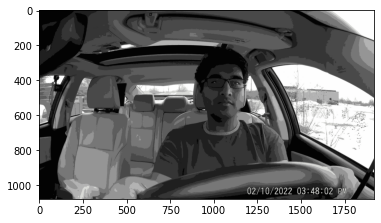

In [ ]:
plt.imshow(result_image)

In [ ]:
import numpy as np

from utils import COLORS, load_image
from scipy.stats import multivariate_normal
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt


ModuleNotFoundError: ignored